In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv("/kaggle/input/time-series-melbourn/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])
data["Temp"] = pd.to_numeric(data["Temp"], errors='coerce')
data = data.dropna()

# Convert Date → numeric index for regression
data["t"] = np.arange(len(data))


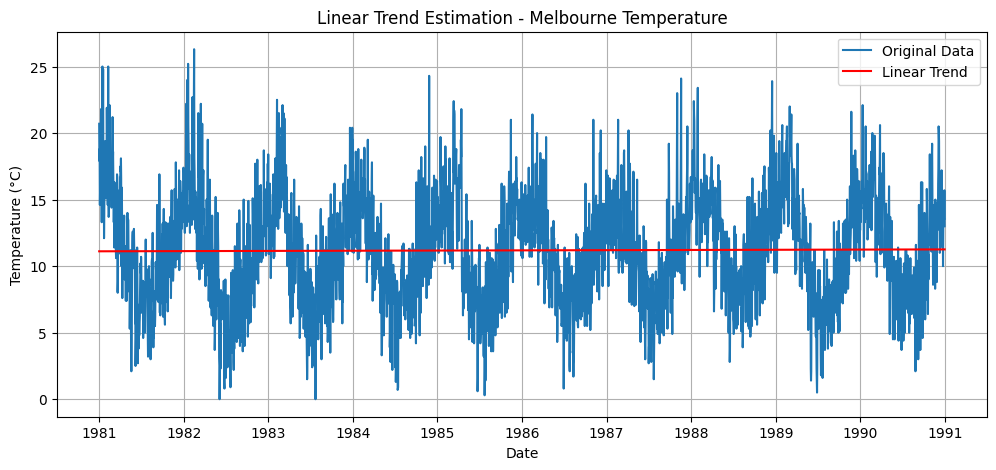

In [3]:

X = data[["t"]]
y = data["Temp"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# Predicted trend line
data["linear_trend"] = linear_model.predict(X)

# Plot
plt.figure(figsize=(12,5))
plt.plot(data["Date"], data["Temp"], label="Original Data")
plt.plot(data["Date"], data["linear_trend"], color='red', label="Linear Trend")
plt.title("Linear Trend Estimation - Melbourne Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


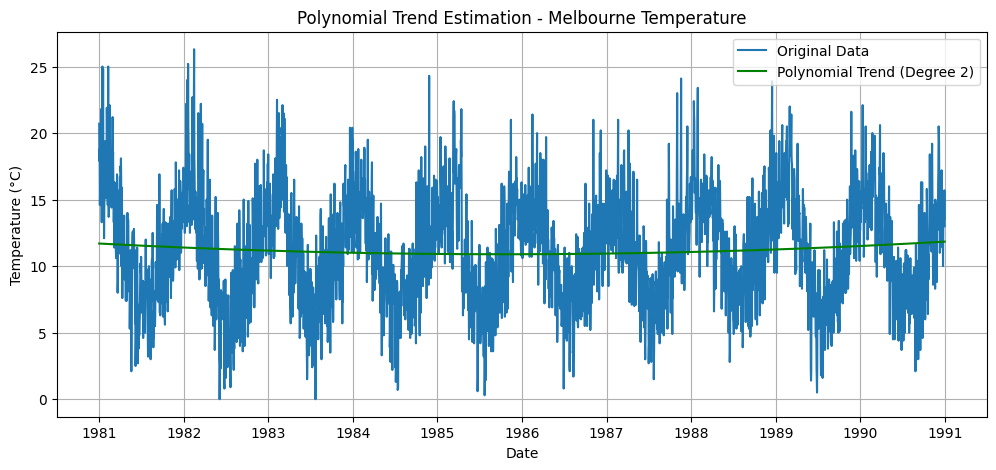

In [4]:
# Polynomial Trend (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[["t"]])

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predicted polynomial trend
data["poly_trend"] = poly_model.predict(X_poly)

# Plot
plt.figure(figsize=(12,5))
plt.plot(data["Date"], data["Temp"], label="Original Data")
plt.plot(data["Date"], data["poly_trend"], color='green', label="Polynomial Trend (Degree 2)")
plt.title("Polynomial Trend Estimation - Melbourne Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
ex3

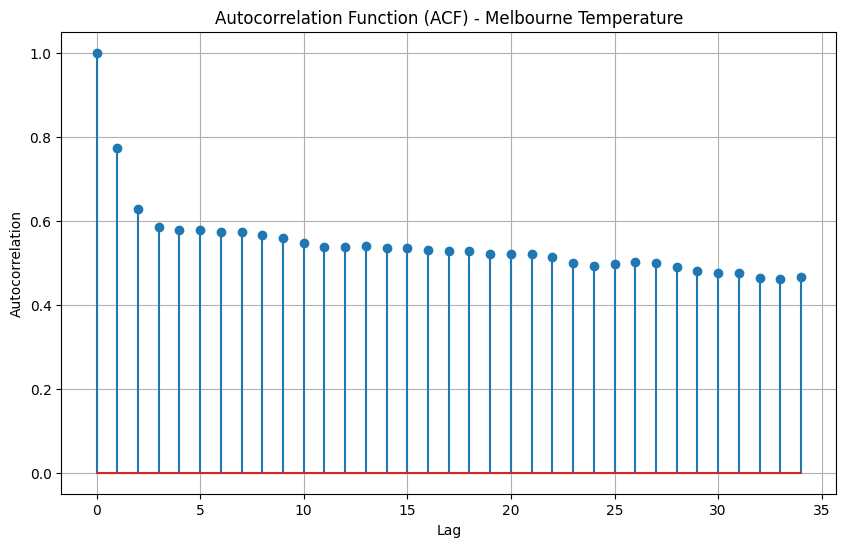

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Melbourne dataset
data = pd.read_csv("/kaggle/input/time-series-melbourn/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])
data["Temp"] = pd.to_numeric(data["Temp"], errors='coerce')
data = data.dropna()

# Use only temperature values
time_series_data = data["Temp"].values

# Length
N = len(time_series_data)

# Lags (0–34)
lags = range(min(35, N // 2))

# Empty list
autocorr_values = []

# Mean & Variance
mean_data = np.mean(time_series_data)
variance_data = np.var(time_series_data)

# Calculate ACF manually
for lag in lags:
    if lag == 0:
        autocorr_values.append(1)  # ACF at lag 0 is 1
    else:
        auto_cov = np.sum((time_series_data[:-lag] - mean_data) *
                          (time_series_data[lag:] - mean_data)) / N
        autocorr_values.append(auto_cov / variance_data)

# Plot ACF
plt.figure(figsize=(10, 6))
plt.stem(lags, autocorr_values)   # FIXED (removed use_line_collection)
plt.title('Autocorrelation Function (ACF) - Melbourne Temperature')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
data = pd.read_csv("/kaggle/input/time-series-melbourn/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])
data["Temp"] = pd.to_numeric(data["Temp"], errors='coerce')
data.dropna(inplace=True)

In [23]:
X = data["Temp"].values
N = len(X)

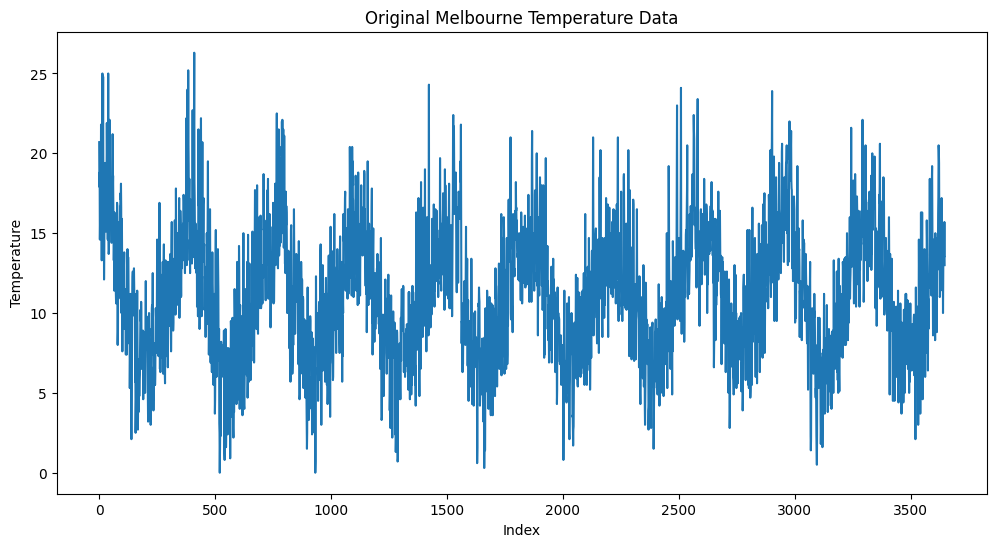

In [24]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(X)
plt.title('Original Melbourne Temperature Data')
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.show()

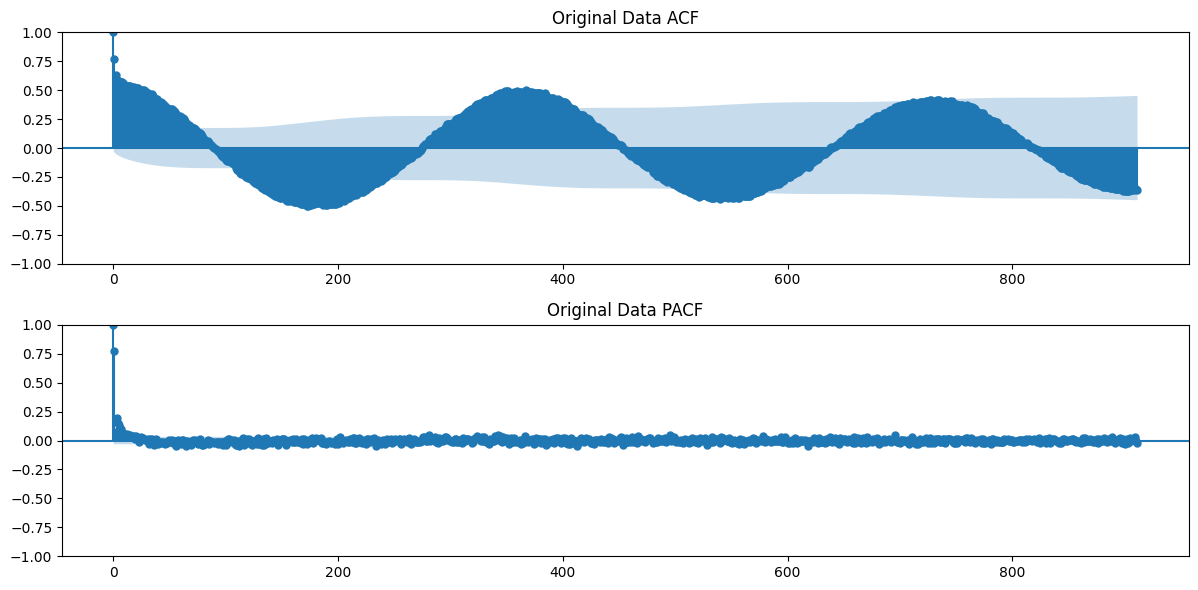

In [25]:
plt.subplot(2, 1, 1)
plot_acf(X, lags=len(X)//4, ax=plt.gca())
plt.title("Original Data ACF")

plt.subplot(2, 1, 2)
plot_pacf(X, lags=len(X)//4, ax=plt.gca())
plt.title("Original Data PACF")
plt.tight_layout()
plt.show()

In [28]:
arma11_model = ARIMA(X, order=(1, 0, 1)).fit()

print("Parameter names:", arma11_model.param_names)
print("Parameters:", arma11_model.params)

phi11_arma11 = arma11_model.params[1]    # AR(1)
theta11_arma11 = arma11_model.params[2]  # MA(1)

print("AR coefficient:", phi11_arma11)
print("MA coefficient:", theta11_arma11)

Parameter names: ['const', 'ar.L1', 'ma.L1', 'sigma2']
Parameters: [11.20546038  0.86589708 -0.24694488  6.53196984]
AR coefficient: 0.8658970822048532
MA coefficient: -0.24694488120463448


In [33]:
ar1 = np.array([1, -phi11_arma11])
ma1 = np.array([1, theta11_arma11])

ARMA_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=N)


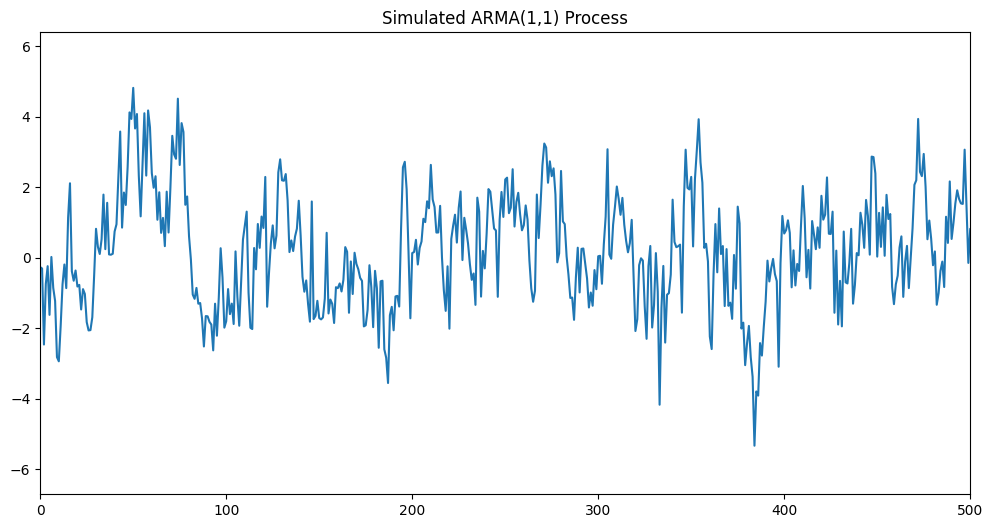

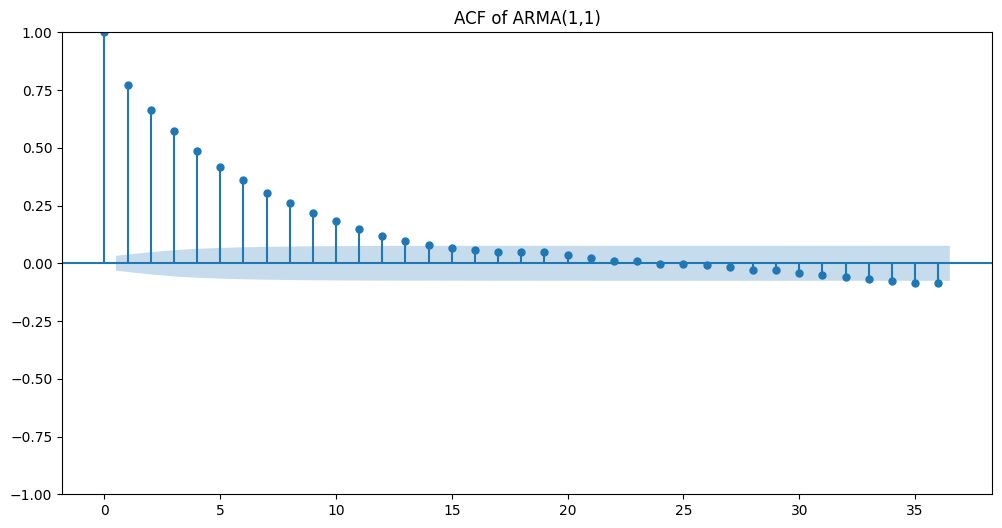

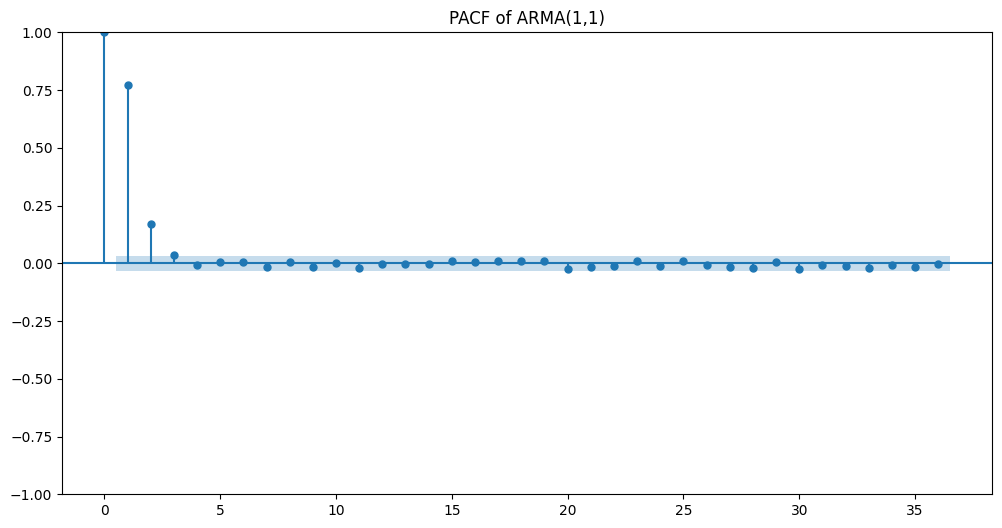

In [34]:
plt.plot(ARMA_1)
plt.title('Simulated ARMA(1,1) Process')
plt.xlim([0, 500])
plt.show()

plot_acf(ARMA_1)
plt.title("ACF of ARMA(1,1)")
plt.show()

plot_pacf(ARMA_1)
plt.title("PACF of ARMA(1,1)")
plt.show()


In [35]:
arma22_model = ARIMA(X, order=(2, 0, 2)).fit()

phi1_arma22 = arma22_model.params[1]   
phi2_arma22 = arma22_model.params[2]   

theta1_arma22 = arma22_model.params[3] 
theta2_arma22 = arma22_model.params[4] 

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [37]:
ar2 = np.array([1, -phi1_arma22, -phi2_arma22])
ma2 = np.array([1, theta1_arma22, theta2_arma22])

ARMA_2 = ArmaProcess(ar2, ma2).generate_sample(nsample=N*10)

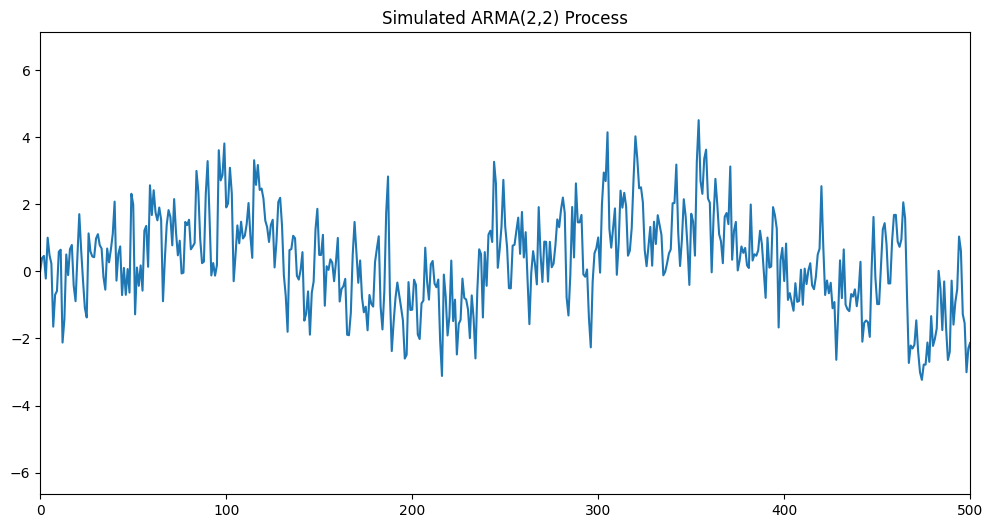

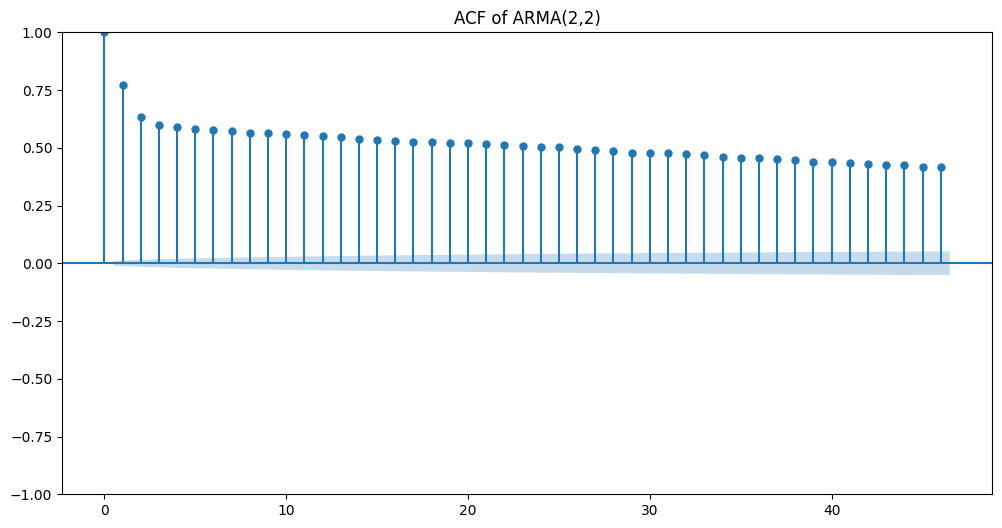

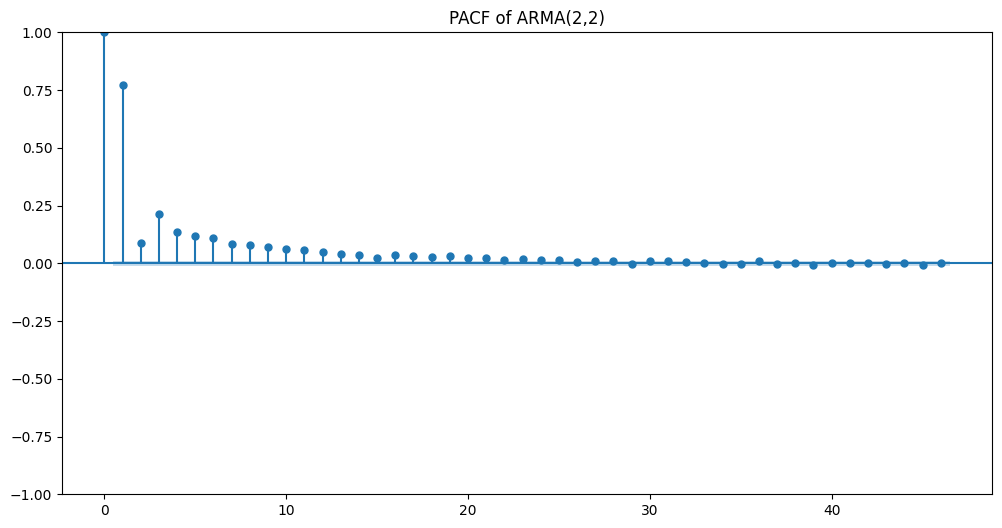

In [38]:
plt.plot(ARMA_2)
plt.title('Simulated ARMA(2,2) Process')
plt.xlim([0, 500])
plt.show()

# ACF & PACF for ARMA(2,2)
plot_acf(ARMA_2)
plt.title("ACF of ARMA(2,2)")
plt.show()

plot_pacf(ARMA_2)
plt.title("PACF of ARMA(2,2)")
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
data = pd.read_csv("/kaggle/input/time-series-melbourn/daily-minimum-temperatures-in-me.csv", on_bad_lines='skip')
data.columns = ["Date", "Temp"]
data["Date"] = pd.to_datetime(data["Date"])          # Convert to datetime
data.set_index("Date", inplace=True)                 # Set index as Date


In [8]:
data["Temp"] = data["Temp"].astype(str).str.replace("?", "", regex=False)

In [9]:
data["Temp"] = pd.to_numeric(data["Temp"], errors='coerce')

In [10]:
data.dropna(inplace=True)

In [12]:
decomposition = seasonal_decompose(data["Temp"], model="additive", period=365)

Text(0.5, 1.0, 'Original Temperature Data')

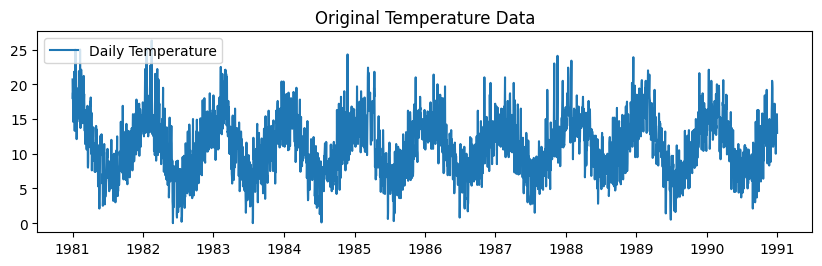

In [13]:
plt.figure(figsize=(10, 12))

# Original Data
plt.subplot(411)
plt.plot(data["Temp"], label='Daily Temperature')
plt.legend(loc='upper left')
plt.title("Original Temperature Data")

Text(0.5, 1.0, 'Trend Plot')

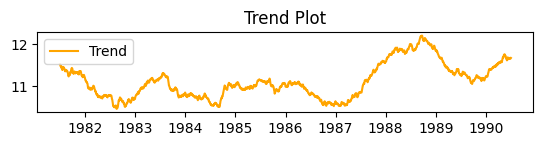

In [15]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title("Trend Plot")

Text(0.5, 1.0, 'Seasonality Plot')

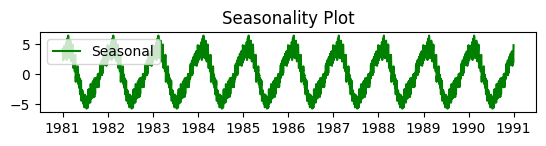

In [16]:
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title("Seasonality Plot")

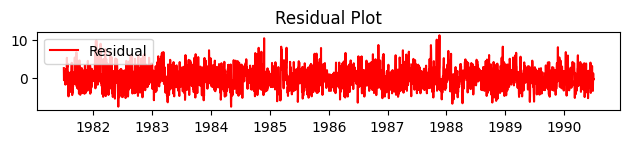

In [17]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title("Residual Plot")

plt.tight_layout()
plt.show()